# Speed and Structure challenge
### Racing to Uncover Earth's Subsurface 🏎️💨

Get ready to rev your engines and race to the subsurface! Welcome to the Speed and Structure challenge, an exhilarating journey that puts you in the driver's seat to pioneer cutting-edge techniques for seismic velocity inversion.

Your mission? To construct high-resolution models of subsurface velocities directly from seismic data. Imagine yourself as a high-tech cartographer of the underworld, transforming complex seismic signals—the very echoes of our planet—into detailed velocity maps. By doing so, you'll be unlocking invaluable insights into the Earth's hidden architecture, revealing geological formations crucial for everything from resource exploration to hazard assessment. This isn't just about listening to the Earth; it's about understanding its intricate inner workings with incredible precision and speed.

This challenge calls for your expertise in navigating complex datasets and your ingenuity in applying or even inventing innovative algorithms, potentially leveraging the power of deep learning, generative models, or hybrid approaches. You'll be tasked with overcoming hurdles like cycle-skipping and the ill-posed nature of traditional inversion methods, pushing the boundaries of what's possible in geophysical interpretation.

And there's more! As you develop robust and efficient algorithms to accurately map the subterranean velocity landscape, you'll be contributing to a deeper understanding of our planet. Your work will play a crucial role in advancing geophysical research and could lead to groundbreaking discoveries, helping us better understand and utilize the Earth's resources responsibly.

So, are you ready to take on the challenge, push the limits of speed and accuracy, and make your mark in the world of seismic interpretation? Let's dive in and start uncovering the true speed and structure of our planet!

### Supplied Materials:

*  Starter Notebook
*  Train dataset: comprises 2000 samples, each organized within its own uniquely named folder corresponding to the sample ID. Within each folder are six 2D NumPy array (`.npy`) files:

    * Five input (feature) files represent synthetic seismic survey data. These are named using the pattern: `receiver_data_src_<i>.npy`, where `<i>` denotes the relative position of the seismic source and takes one of the following values: [1, 75, 150, 225, 300].

    * One target file, named `vp_model.npy`, contains the ground-truth subsurface velocity model associated with the corresponding seismic inputs.

* Test dataset: comprises 150 samples, each organized similarly to the training set. Every sample includes five input (feature) files representing synthetic seismic survey data. These files follow the same naming convention as in the training dataset. Unlike the training dataset, the test set does not include the target file (vp_model.npy). Your prediction for this dataset will be used to calculate your score for the predictive leaderboard.

*  `utils.py`: containing some functions used in this starter notebook and to help you get started.
*  `requirements.txt`: this file should contain all the required packages for your submission.

## Understanding the Data: A Glimpse into Seismic Surveys

To understand what lies hidden beneath the Earth's surface, whether deep underground or beneath the ocean floor, geophysicists conduct seismic surveys. Imagine a process somewhat like medical ultrasound, but on a vastly larger scale, designed to create an "image" of the subsurface geology.

As illustrated in the schematic image below, a specialized survey ship typically tows an energy source (like an "air gun") and a series of sensitive underwater microphones called "hydrophones." The air gun releases a powerful burst of sound waves that travel down through the water and into the seabed. These waves continue to propagate deeper, penetrating through various geological layers – different types of rock, sediments, and potentially encountering reservoirs containing oil, gas, or water. When these sound waves encounter a boundary between different materials (e.g., where one type of rock layer ends and another begins, or where fluid content changes), a portion of their energy is reflected back towards the surface.

These returning "echoes" are then detected and meticulously recorded by the hydrophones. Each set of recordings from a single burst of the air gun, captured by the array of hydrophones, is essentially a snapshot of how the sound waves have interacted with the subsurface. In this challenge, the input files you'll be working with (e.g., `receiver_data_src_1.npy`, `receiver_data_src_75.npy`, etc.) represent this synthetic seismic survey data. Each file corresponds to the data recorded from a series of receivers for a specific shot or relative position of the sound source. The target file (`vp_model.npy`) is the "ground truth" – it's the actual map of how fast those sound waves travel through the different materials in the subsurface (the velocity model). Your task is to use the recorded seismic signals (the input) to reconstruct this detailed velocity model (the target), effectively creating a high-resolution picture of the Earth's hidden structures.

Kukreja, Navjot & Louboutin, Mathias & Lange, Michael & Luporini, Fabio & Gorman, G.. (2017). Rapid Development of Seismic Imaging Applications Using Symbolic Math. 10.3997/2214-4609.201702315.

![alt text](offshore-seismic-survey.png "Offshore seismic survey")



# Imports
REMEMBER TO ADD YOUR PACKAGES TO the requirements.txt

In [1]:
!pip install anytree utils
import os
import sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from anytree import Node, RenderTree
from typing import Dict, List

from utils import *

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.4 MB/s eta 0:00:00
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=829b6e00d1c44eeb8eb03417206bd4b4005cfcd06604d6a3ee3d413cb8c4b4f1
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


# Data

You can download the train and test data from the challenge’s webpage or portal under the data tab.

Let's assume that you have downloaded the train and test data, and organized them as shown in the tree below.

<b>Note:</b> For demonstration purposes in this starter notebook, only a subset of the full dataset is included: 5 samples in the train folder and 4 samples in the test folder.  Please note that in the complete dataset, these numbers will be expanded to 2000 training samples and 150 test samples, respectively.

In [2]:
import os

# Create the main 'data' directory
os.makedirs('data', exist_ok=True)

# Download the train data
!wget https://xeek-public-287031953319-eb80.s3.amazonaws.com/speed-and-structure/speed-and-structure-train-data.zip

# Unzip train data directly into data/train
# The -d flag specifies the destination directory.
# The `unzip` command will create 'train/input' and 'train/target' automatically
# if they are present in the zip file's root.
!unzip speed-and-structure-train-data.zip -d data/train/



# Verify the structure (optional)



Streaming output truncated to the last 5000 lines.
  inflating: data/train/cQDPayDywaXCXmqy2N/receiver_data_src_1.npy  
  inflating: data/train/cQDPayDywaXCXmqy2N/receiver_data_src_75.npy  
   creating: data/train/cS4T3yIXu9ZTNtXcak/
  inflating: data/train/cS4T3yIXu9ZTNtXcak/receiver_data_src_150.npy  
  inflating: data/train/cS4T3yIXu9ZTNtXcak/vp_model.npy  
  inflating: data/train/cS4T3yIXu9ZTNtXcak/receiver_data_src_225.npy  
  inflating: data/train/cS4T3yIXu9ZTNtXcak/receiver_data_src_300.npy  
  inflating: data/train/cS4T3yIXu9ZTNtXcak/receiver_data_src_1.npy  
  inflating: data/train/cS4T3yIXu9ZTNtXcak/receiver_data_src_75.npy  
   creating: data/train/cS5162zA46neO0qk7a/
  inflating: data/train/cS5162zA46neO0qk7a/receiver_data_src_150.npy  
  inflating: data/train/cS5162zA46neO0qk7a/vp_model.npy  
  inflating: data/train/cS5162zA46neO0qk7a/receiver_data_src_225.npy  
  inflating: data/train/cS5162zA46neO0qk7a/receiver_data_src_300.npy  
  inflating: data/train/cS5162zA46neO0qk7

In [3]:
# Download the test data
!wget https://xeek-public-287031953319-eb80.s3.amazonaws.com/speed-and-structure/speed-and-structure-test-data.zip
# Unzip test data directly into data/test
# Similar to above, `unzip` will create 'test/input' if present in the zip file's root.
!unzip speed-and-structure-test-data.zip -d data/test/

# (Optional) Clean up the downloaded zip files
!rm speed-and-structure-train-data.zip
!rm speed-and-structure-test-data.zip

--2025-07-08 10:54:14--  https://xeek-public-287031953319-eb80.s3.amazonaws.com/speed-and-structure/speed-and-structure-test-data.zip
Resolving xeek-public-287031953319-eb80.s3.amazonaws.com (xeek-public-287031953319-eb80.s3.amazonaws.com)... 16.15.200.129, 3.5.29.165, 3.5.25.159, ...
Connecting to xeek-public-287031953319-eb80.s3.amazonaws.com (xeek-public-287031953319-eb80.s3.amazonaws.com)|16.15.200.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 808343117 (771M) [application/zip]
Saving to: ‘speed-and-structure-test-data.zip’

speed-and-structure 100%[===================>] 770.90M  52.7MB/s    in 14s     

2025-07-08 10:54:28 (53.4 MB/s) - ‘speed-and-structure-test-data.zip’ saved [808343117/808343117]

Archive:  speed-and-structure-test-data.zip
   creating: data/test/0BFqBxnVIT368FwmdR/
  inflating: data/test/0BFqBxnVIT368FwmdR/receiver_data_src_150.npy  
  inflating: data/test/0BFqBxnVIT368FwmdR/receiver_data_src_225.npy  
  inflating: data/test/0BF

In [4]:
print("\nVerifying directory structure:")
!ls -R data

Streaming output truncated to the last 5000 lines.

data/train/gCX7OmpqaO8zbkcXWF:
receiver_data_src_150.npy  receiver_data_src_225.npy  receiver_data_src_75.npy
receiver_data_src_1.npy    receiver_data_src_300.npy  vp_model.npy

data/train/Gd7hYryVl6rOaXX3cO:
receiver_data_src_150.npy  receiver_data_src_225.npy  receiver_data_src_75.npy
receiver_data_src_1.npy    receiver_data_src_300.npy  vp_model.npy

data/train/gDFnjBPRZkKFA71Llj:
receiver_data_src_150.npy  receiver_data_src_225.npy  receiver_data_src_75.npy
receiver_data_src_1.npy    receiver_data_src_300.npy  vp_model.npy

data/train/gdpkrCLwNyAV7r99cC:
receiver_data_src_150.npy  receiver_data_src_225.npy  receiver_data_src_75.npy
receiver_data_src_1.npy    receiver_data_src_300.npy  vp_model.npy

data/train/gdToGZXPcBBzTP7kJl:
receiver_data_src_150.npy  receiver_data_src_225.npy  receiver_data_src_75.npy
receiver_data_src_1.npy    receiver_data_src_300.npy  vp_model.npy

data/train/gEaPweempmdaMdy01N:
receiver_data_src_150.npy  


Below, we begin by listing the sample IDs for the five samples included in the `train` folder. We then display the file names contained within the first sample directory.

As outlined earlier in the **Supplied Materials** section, each sample contains:

- **Five input (feature) files** named `receiver_data_src_<i>.npy`, where `<i>` indicates the source position.
- **One target file**, `vp_model.npy`, which represents the ground-truth subsurface velocity model.


In [5]:
# Directory path
training_dataset = "./data/train/*"  # 'path to your training data'

# List to store the names of subfolders (sample IDs)
sample_paths = glob(training_dataset)
# extract the name of samples, i.e. sample IDs
sample_ids = [path.split("/")[-1] for path in sample_paths]
sample_ids

['5L4UBep6uUAMlvAq2s',
 '9qnlCRzK4hDPgsAxEA',
 'UYIfRUfJpY6kES5oW1',
 'fzi9o1uWyHatdUFBLB',
 'gCX7OmpqaO8zbkcXWF',
 'DFEFjnPeMBhnkpe58R',
 '6wNbESuFQPd99jbvub',
 'qPWAOSqPtzGfk0cgm0',
 'wKEbQDhTskNU8Ex0eC',
 'Sx7OqBfWRPKWVcIRXq',
 'hDnbeLGOQbF0DLt1lK',
 'AVFc5VXeNchRpPUuwn',
 '6X2fOMiNczRnJ9uwbx',
 'SdiOmdZ8ahJOKrsWPf',
 'v9HMpNPuziqiRwStDX',
 'J2PpbHzBc6ckJcUv0I',
 'M8aDQsgCemcGQzZMcB',
 'rRCo0nMjnFZJUtKueQ',
 'TgTIybDc9IhHUyPFSB',
 'Yb9DSlq935AM1XlS45',
 'B9ZhSDpo2iWac4vSDH',
 '3hdVsEDfhjza31iZZ4',
 'pGoUEzcP9fJLqRhcAm',
 'y6EEGLMN9evhjKIDH5',
 'sHzOHO3zFaHiTALm3D',
 'bSPfvFP3kIR8ZeiEJS',
 'qLagnypbDBLEBoHmZW',
 'JXMwfCZiLBRzRv6j8k',
 'np3sNztpPzz86pOrte',
 'WLp5KoPmoRvp6F174x',
 'l1jPA9TypCrqoWON0A',
 'EoScPkwVhWGkyHR8kd',
 'ilrP7hlt18uPABFsF5',
 'J4rgiwvMqWq5GBmIk6',
 'EV7I7PROPkNclHF7AQ',
 'SWgIpbCQ23DWJgzK2c',
 'gdpkrCLwNyAV7r99cC',
 'rJOOfd3lMXZrp7wil9',
 'pvV65XAoOFPwIyqvoh',
 '2lFIB7yDd5VeDVGPtN',
 'YAx4jc7GdrV9zKxwbn',
 'kHRE3Dan8lBFvqiUDz',
 'zbtO1yw8Agg1iGQHjm',
 'tuuFoPtwU

In [6]:
# List all file names for the first sample
file_names = os.listdir(sample_paths[0])
file_names

['receiver_data_src_75.npy',
 'receiver_data_src_225.npy',
 'vp_model.npy',
 'receiver_data_src_300.npy',
 'receiver_data_src_150.npy',
 'receiver_data_src_1.npy']

> **Note:**  
> All receiver data, regardless of the source position, are stored as 2D NumPy arrays with shape **(10001, 31)**.  
> - The **31 columns** correspond to individual receivers.  
> - The **rows** represent time steps in the recording.  
> - Thus, `receiver_data[i, j]` indicates the signal recorded by the **j-th receiver** at the **i-th time unit**.
>
> All target data (velocity models) are also 2D NumPy arrays with shape **(300, 1259)**.  
> - The **columns** (second axis) represent the **vertical physical axis** in the subsurface (i.e., depth).  
> - The **rows** (first axis) represent the **horizontal physical axis**.  
> - Therefore, `target_data[i, j]` gives the wave velocity at a point located **i units horizontally** and **j units in depth** from the measurement origin.


In [7]:
# single source np.ndarray
rec_data = np.load(os.path.join(sample_paths[0], f"receiver_data_src_1.npy"))
print("Receiver data shape:", rec_data.shape)
# target velocity model
target_data = np.load(os.path.join(sample_paths[0], "vp_model.npy"))
print("Target data shape:", target_data.shape)

Receiver data shape: (10001, 31)
Target data shape: (300, 1259)


In [8]:
# prompt: how to get the tree like structure of my "data" folder

def tree(dir_path: str, level: int = -1, limit_to_directories: bool = False,
         length_limit: int = 1000):
    """Given a directory path, print a tree structure of its contents.

    Args:
        dir_path: Path to the directory.
        level: The maximum depth to descend into the tree. -1 means infinite depth.
        limit_to_directories: Only show directories in the tree.
        length_limit: Truncate long lists of files/directories to this length.
    """
    dir_path = os.path.normpath(dir_path)  # Normalize path
    root_name = os.path.basename(dir_path) if dir_path != '.' else '.'
    root = Node(root_name)

    def build_tree(node: Node, current_path: str, current_level: int):
        if level != -1 and current_level >= level:
            return

        try:
            entries = sorted(os.listdir(current_path))
        except OSError:
            return # Cannot access directory

        if length_limit is not None and len(entries) > length_limit:
            entries = entries[:length_limit] + ['...']

        for entry in entries:
            full_path = os.path.join(current_path, entry)
            is_dir = os.path.isdir(full_path)

            if limit_to_directories and not is_dir:
                continue

            child = Node(entry, parent=node)
            if is_dir:
                build_tree(child, full_path, current_level + 1)

    build_tree(root, dir_path, 0)

    for pre, _, node in RenderTree(root):
        print(f"{pre}{node.name}")

# Use the function to print the tree structure of the 'data' folder
tree('./data')

data
├── test
│   ├── 0BFqBxnVIT368FwmdR
│   │   ├── receiver_data_src_1.npy
│   │   ├── receiver_data_src_150.npy
│   │   ├── receiver_data_src_225.npy
│   │   ├── receiver_data_src_300.npy
│   │   └── receiver_data_src_75.npy
│   ├── 0yONYjTWNAfKjAilsA
│   │   ├── receiver_data_src_1.npy
│   │   ├── receiver_data_src_150.npy
│   │   ├── receiver_data_src_225.npy
│   │   ├── receiver_data_src_300.npy
│   │   └── receiver_data_src_75.npy
│   ├── 1Siz5HTYKwwwp6fVn2
│   │   ├── receiver_data_src_1.npy
│   │   ├── receiver_data_src_150.npy
│   │   ├── receiver_data_src_225.npy
│   │   ├── receiver_data_src_300.npy
│   │   └── receiver_data_src_75.npy
│   ├── 1bxHtxAYD1Kc9Rfz1T
│   │   ├── receiver_data_src_1.npy
│   │   ├── receiver_data_src_150.npy
│   │   ├── receiver_data_src_225.npy
│   │   ├── receiver_data_src_300.npy
│   │   └── receiver_data_src_75.npy
│   ├── 1jXPNR2ab7iMuw5FS0
│   │   ├── receiver_data_src_1.npy
│   │   ├── receiver_data_src_150.npy
│   │   ├── receiver_data_src

### Visualizing a Sample: Seismic Survey Data and Velocity Model

Below, we visualize the **seismic survey data** (i.e., receiver data) for a selected sample, along with its corresponding **ground-truth velocity model**.

The goal of this challenge is to develop a model that takes the **five receiver data inputs** (shown in the left five plots) and predicts the **velocity model** (shown in the rightmost plot). In essence, the task is to learn a mapping from seismic recordings to the underlying subsurface velocity structure.


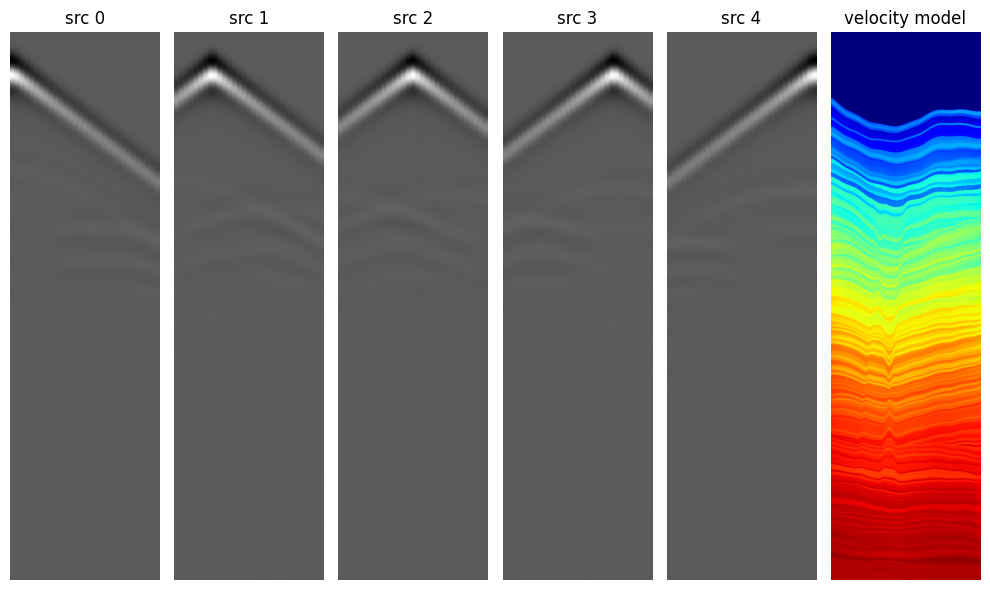

In [9]:
# Plot one dataset sample
sample_path = sample_paths[100]

source_coordinates = [1, 75, 150, 225, 300]

f, ax = plt.subplots(1, 6, figsize=(10, 6))

for i, s in enumerate(source_coordinates):
    rec_data = np.load(os.path.join(sample_path, f"receiver_data_src_{s}.npy"))
    ax[i].imshow(rec_data, cmap="gray", aspect="auto")
    ax[i].set_title(f"src {i}")
    ax[i].axis("off")

target_data = np.load(os.path.join(sample_path, "vp_model.npy"))
ax[-1].imshow(target_data.T, cmap="jet", aspect="auto")
ax[-1].set_title("velocity model")
ax[-1].axis("off")

plt.tight_layout()
plt.show()

## Your Solution
Your task is summarized below.

**Objective:**  
Develop a model that takes seismic receiver data as input and predicts the corresponding subsurface velocity model.

**Input:**  
- Five 2D NumPy arrays, each with shape **(10001, 31)**  
- These arrays represent receiver data and are of type `numpy.float32`

**Output:**  
- A single 2D NumPy array with shape **(300, 1259)**  
- This array represents the predicted velocity model and **must** be of type `numpy.float64`



=== EXPLORING TRAINING DATA ===
Found 2000 samples in data/train

Exploring sample: 5L4UBep6uUAMlvAq2s
  receiver_data_src_1.npy: shape (10001, 31), dtype float32
  receiver_data_src_75.npy: shape (10001, 31), dtype float32
  receiver_data_src_150.npy: shape (10001, 31), dtype float32
  receiver_data_src_225.npy: shape (10001, 31), dtype float32
  receiver_data_src_300.npy: shape (10001, 31), dtype float32
  vp_model.npy: shape (300, 1259), dtype float64

=== EXPLORING TEST DATA ===
Found 150 samples in data/test

Exploring sample: LAfyV0EK786wuNf3nY
  receiver_data_src_1.npy: shape (10001, 31), dtype float32
  receiver_data_src_75.npy: shape (10001, 31), dtype float32
  receiver_data_src_150.npy: shape (10001, 31), dtype float32
  receiver_data_src_225.npy: shape (10001, 31), dtype float32
  receiver_data_src_300.npy: shape (10001, 31), dtype float32
  vp_model.npy: NOT FOUND (likely test data)

=== STARTING TRAINING ===
Using device: cuda
Found 2000 samples
Training samples: 1800
Val

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe


Epoch 1/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 1.309507, Train MAPE: 44.42%
Val Loss: 0.932069, Val MAPE: 29.74%
New best model saved! Val Loss: 0.932069

Epoch 2/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.721088, Train MAPE: 22.92%
Val Loss: 0.544199, Val MAPE: 17.57%
New best model saved! Val Loss: 0.544199

Epoch 3/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.344170, Train MAPE: 11.41%
Val Loss: 0.220155, Val MAPE: 8.55%
New best model saved! Val Loss: 0.220155

Epoch 4/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.174443, Train MAPE: 6.41%
Val Loss: 0.158608, Val MAPE: 6.26%
New best model saved! Val Loss: 0.158608

Epoch 5/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.149489, Train MAPE: 5.68%
Val Loss: 0.126960, Val MAPE: 4.82%
New best model saved! Val Loss: 0.126960

Epoch 6/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.138803, Train MAPE: 5.28%
Val Loss: 0.123012, Val MAPE: 4.68%
New best model saved! Val Loss: 0.123012

Epoch 7/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.124693, Train MAPE: 4.71%
Val Loss: 0.180063, Val MAPE: 7.35%

Epoch 8/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.116462, Train MAPE: 4.35%
Val Loss: 0.224711, Val MAPE: 9.60%

Epoch 9/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.113576, Train MAPE: 4.22%
Val Loss: 0.173758, Val MAPE: 6.79%

Epoch 10/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.109001, Train MAPE: 4.04%
Val Loss: 0.144201, Val MAPE: 5.28%

Epoch 11/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.108848, Train MAPE: 4.03%
Val Loss: 0.103526, Val MAPE: 3.90%
New best model saved! Val Loss: 0.103526

Epoch 12/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.106934, Train MAPE: 3.95%
Val Loss: 0.114655, Val MAPE: 4.15%

Epoch 13/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.103650, Train MAPE: 3.81%
Val Loss: 0.220658, Val MAPE: 9.36%

Epoch 14/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.103043, Train MAPE: 3.78%
Val Loss: 0.142538, Val MAPE: 5.13%

Epoch 15/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.101686, Train MAPE: 3.73%
Val Loss: 0.138925, Val MAPE: 5.00%

Epoch 16/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.100855, Train MAPE: 3.69%
Val Loss: 0.110126, Val MAPE: 4.06%

Epoch 17/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.100308, Train MAPE: 3.66%
Val Loss: 0.108804, Val MAPE: 4.17%

Epoch 18/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.093539, Train MAPE: 3.38%
Val Loss: 0.091269, Val MAPE: 3.30%
New best model saved! Val Loss: 0.091269

Epoch 19/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.091935, Train MAPE: 3.32%
Val Loss: 0.091724, Val MAPE: 3.30%

Epoch 20/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.091497, Train MAPE: 3.30%
Val Loss: 0.090564, Val MAPE: 3.27%
New best model saved! Val Loss: 0.090564

Epoch 21/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.091324, Train MAPE: 3.29%
Val Loss: 0.091192, Val MAPE: 3.28%

Epoch 22/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.091017, Train MAPE: 3.28%
Val Loss: 0.091285, Val MAPE: 3.30%

Epoch 23/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.090617, Train MAPE: 3.26%
Val Loss: 0.098338, Val MAPE: 3.65%

Epoch 24/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.090484, Train MAPE: 3.25%
Val Loss: 0.090433, Val MAPE: 3.27%
New best model saved! Val Loss: 0.090433

Epoch 25/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.090260, Train MAPE: 3.24%
Val Loss: 0.089940, Val MAPE: 3.26%
New best model saved! Val Loss: 0.089940

Epoch 26/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.090184, Train MAPE: 3.24%
Val Loss: 0.090425, Val MAPE: 3.25%

Epoch 27/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.089761, Train MAPE: 3.22%
Val Loss: 0.090976, Val MAPE: 3.30%

Epoch 28/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.089769, Train MAPE: 3.22%
Val Loss: 0.090626, Val MAPE: 3.30%

Epoch 29/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.089453, Train MAPE: 3.21%
Val Loss: 0.093809, Val MAPE: 3.44%

Epoch 30/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.089371, Train MAPE: 3.20%
Val Loss: 0.090717, Val MAPE: 3.25%

Epoch 31/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.089246, Train MAPE: 3.20%
Val Loss: 0.090117, Val MAPE: 3.23%

Epoch 32/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088506, Train MAPE: 3.17%
Val Loss: 0.089385, Val MAPE: 3.20%
New best model saved! Val Loss: 0.089385

Epoch 33/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088467, Train MAPE: 3.16%
Val Loss: 0.089012, Val MAPE: 3.20%
New best model saved! Val Loss: 0.089012

Epoch 34/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088386, Train MAPE: 3.16%
Val Loss: 0.089059, Val MAPE: 3.19%

Epoch 35/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088382, Train MAPE: 3.16%
Val Loss: 0.088968, Val MAPE: 3.19%
New best model saved! Val Loss: 0.088968

Epoch 36/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088439, Train MAPE: 3.16%
Val Loss: 0.088973, Val MAPE: 3.19%

Epoch 37/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088259, Train MAPE: 3.15%
Val Loss: 0.089348, Val MAPE: 3.20%

Epoch 38/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088263, Train MAPE: 3.15%
Val Loss: 0.089207, Val MAPE: 3.20%

Epoch 39/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088235, Train MAPE: 3.15%
Val Loss: 0.089034, Val MAPE: 3.19%

Epoch 40/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088110, Train MAPE: 3.15%
Val Loss: 0.088915, Val MAPE: 3.19%
New best model saved! Val Loss: 0.088915

Epoch 41/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088252, Train MAPE: 3.15%
Val Loss: 0.089024, Val MAPE: 3.19%

Epoch 42/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088101, Train MAPE: 3.15%
Val Loss: 0.088829, Val MAPE: 3.19%
New best model saved! Val Loss: 0.088829

Epoch 43/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088138, Train MAPE: 3.15%
Val Loss: 0.089125, Val MAPE: 3.20%

Epoch 44/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088191, Train MAPE: 3.15%
Val Loss: 0.089084, Val MAPE: 3.19%

Epoch 45/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088095, Train MAPE: 3.15%
Val Loss: 0.088925, Val MAPE: 3.19%

Epoch 46/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.087986, Train MAPE: 3.14%
Val Loss: 0.088902, Val MAPE: 3.19%

Epoch 47/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.087996, Train MAPE: 3.14%
Val Loss: 0.088894, Val MAPE: 3.19%

Epoch 48/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.088113, Train MAPE: 3.15%
Val Loss: 0.088944, Val MAPE: 3.19%

Epoch 49/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.087947, Train MAPE: 3.14%
Val Loss: 0.089078, Val MAPE: 3.19%

Epoch 50/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.087981, Train MAPE: 3.14%
Val Loss: 0.088936, Val MAPE: 3.19%


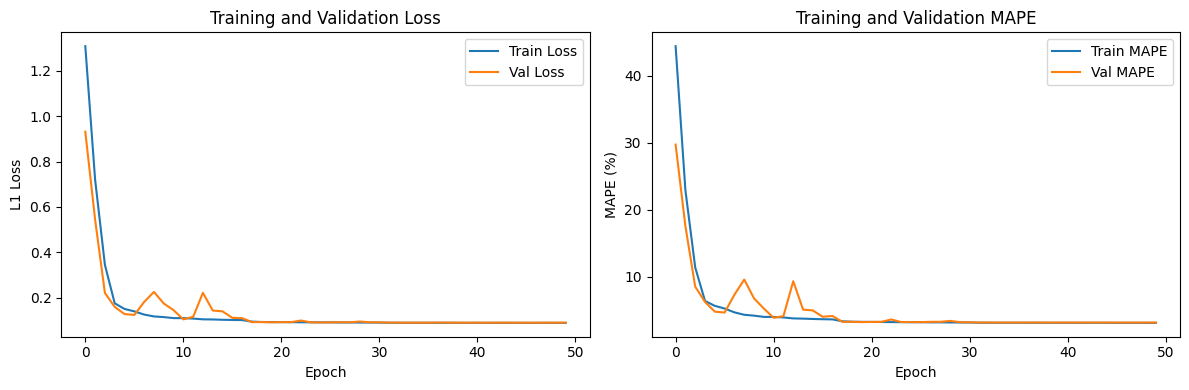

In [12]:
# Seismic Velocity Inversion Challenge - Complete Implementation
# Based on the comprehensive roadmap and formal problem definition

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ==========================================
# SQUEEZE-AND-EXCITATION ATTENTION BLOCK
# ==========================================

class SEBlock(nn.Module):
    """Squeeze-and-Excitation block for channel attention"""
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.global_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# ==========================================
# ADVANCED U-NET WITH RESNET ENCODER
# ==========================================

class SeismicUNet(nn.Module):
    """
    FCRN-based U-Net with ResNet34 encoder and SE attention blocks

    Input: 5-channel seismic data (5, H, W)
    Output: Velocity model (1, H_out, W_out)
    """

    def __init__(self, input_channels=5, output_channels=1, use_attention=True):
        super(SeismicUNet, self).__init__()

        # Load pretrained ResNet34 as encoder
        resnet = models.resnet34(pretrained=True)

        # Modify first conv layer to accept 5 channels instead of 3
        self.encoder_conv1 = nn.Conv2d(input_channels, 64, kernel_size=7,
                                      stride=2, padding=3, bias=False)

        # Copy pretrained weights for the first 3 channels, initialize rest randomly
        with torch.no_grad():
            self.encoder_conv1.weight[:, :3] = resnet.conv1.weight
            # Initialize remaining 2 channels with small random values
            nn.init.kaiming_normal_(self.encoder_conv1.weight[:, 3:])

        # Extract encoder stages
        self.encoder_bn1 = resnet.bn1
        self.encoder_relu = resnet.relu
        self.encoder_maxpool = resnet.maxpool

        self.encoder_layer1 = resnet.layer1  # 64 channels
        self.encoder_layer2 = resnet.layer2  # 128 channels
        self.encoder_layer3 = resnet.layer3  # 256 channels
        self.encoder_layer4 = resnet.layer4  # 512 channels

        # SE Attention blocks
        self.use_attention = use_attention
        if use_attention:
            self.se1 = SEBlock(64)
            self.se2 = SEBlock(128)
            self.se3 = SEBlock(256)
            self.se4 = SEBlock(512)

        # Decoder blocks with skip connections
        self.decoder4 = self._make_decoder_block(512, 256)
        self.decoder3 = self._make_decoder_block(256 + 256, 128)  # +256 for skip
        self.decoder2 = self._make_decoder_block(128 + 128, 64)   # +128 for skip
        self.decoder1 = self._make_decoder_block(64 + 64, 32)     # +64 for skip

        # Final output layer
        self.final_conv = nn.Conv2d(32, output_channels, kernel_size=1)

    def _make_decoder_block(self, in_channels, out_channels):
        """Create a decoder block with conv transpose + conv + batch norm + relu"""
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def _match_dimensions(self, tensor1, tensor2):
        """
        Match dimensions of tensor1 to tensor2 by cropping or padding
        This ensures skip connections work properly
        """
        # Get dimensions
        _, _, h1, w1 = tensor1.size()
        _, _, h2, w2 = tensor2.size()

        # If dimensions already match, return as is
        if h1 == h2 and w1 == w2:
            return tensor1

        # If tensor1 is larger, crop it to match tensor2
        if h1 > h2 or w1 > w2:
            # Calculate crop amounts
            crop_h = max(0, h1 - h2)
            crop_w = max(0, w1 - w2)

            # Crop from center
            start_h = crop_h // 2
            start_w = crop_w // 2

            tensor1 = tensor1[:, :, start_h:start_h+h2, start_w:start_w+w2]

        # If tensor1 is smaller, pad it to match tensor2
        elif h1 < h2 or w1 < w2:
            # Calculate padding amounts
            pad_h = max(0, h2 - h1)
            pad_w = max(0, w2 - w1)

            # Pad symmetrically
            pad_top = pad_h // 2
            pad_bottom = pad_h - pad_top
            pad_left = pad_w // 2
            pad_right = pad_w - pad_left

            tensor1 = F.pad(tensor1, (pad_left, pad_right, pad_top, pad_bottom), mode='reflect')

        return tensor1

    def forward(self, x):
        # Encoder path
        x1 = self.encoder_conv1(x)
        x1 = self.encoder_bn1(x1)
        x1 = self.encoder_relu(x1)
        x1_pool = self.encoder_maxpool(x1)

        x2 = self.encoder_layer1(x1_pool)
        x3 = self.encoder_layer2(x2)
        x4 = self.encoder_layer3(x3)
        x5 = self.encoder_layer4(x4)

        # Apply attention
        if self.use_attention:
            x2 = self.se1(x2)
            x3 = self.se2(x3)
            x4 = self.se3(x4)
            x5 = self.se4(x5)

        # Decoder path with skip connections and dimension matching
        d4 = self.decoder4(x5)

        # Match dimensions before concatenation
        x4_matched = self._match_dimensions(x4, d4)
        d3 = self.decoder3(torch.cat([d4, x4_matched], dim=1))

        x3_matched = self._match_dimensions(x3, d3)
        d2 = self.decoder2(torch.cat([d3, x3_matched], dim=1))

        x2_matched = self._match_dimensions(x2, d2)
        d1 = self.decoder1(torch.cat([d2, x2_matched], dim=1))

        # Final output
        output = self.final_conv(d1)

        # Ensure output matches target dimensions (300, 1259)
        output = F.interpolate(output, size=(300, 1259), mode='bilinear', align_corners=False)

        return output

# ==========================================
# DATASET CLASS
# ==========================================

class SeismicDataset(Dataset):
    """
    Custom dataset for seismic velocity inversion

    Expected data structure:
    data_dir/
    ├── train/
    │   ├── OsAKefTbEOCZVgO7LM/
    │   │   ├── receiver_data_src_1.npy
    │   │   ├── receiver_data_src_75.npy
    │   │   ├── receiver_data_src_150.npy
    │   │   ├── receiver_data_src_225.npy
    │   │   ├── receiver_data_src_300.npy
    │   │   └── vp_model.npy  # Target
    │   └── ...
    └── test/
        ├── 0BFqBxnVIT368FwmdR/
        │   ├── receiver_data_src_1.npy
        │   ├── receiver_data_src_75.npy
        │   ├── receiver_data_src_150.npy
        │   ├── receiver_data_src_225.npy
        │   └── receiver_data_src_300.npy
        └── ...
    """

    def __init__(self, data_dir, sample_ids, is_test=False, transform=None):
        self.data_dir = Path(data_dir)
        self.sample_ids = sample_ids
        self.is_test = is_test
        self.transform = transform

        # Define the order of receiver data files
        self.receiver_files = [
            'receiver_data_src_1.npy',
            'receiver_data_src_75.npy',
            'receiver_data_src_150.npy',
            'receiver_data_src_225.npy',
            'receiver_data_src_300.npy'
        ]

    def __len__(self):
        return len(self.sample_ids)

    def __getitem__(self, idx):
        sample_id = self.sample_ids[idx]
        sample_dir = self.data_dir / sample_id

        # Load 5 receiver data files
        shots = []
        for receiver_file in self.receiver_files:
            receiver_path = sample_dir / receiver_file
            if not receiver_path.exists():
                raise FileNotFoundError(f"Receiver file not found: {receiver_path}")

            receiver_data = np.load(receiver_path).astype(np.float32)
            shots.append(receiver_data)

        # Stack shots into 5-channel input
        input_data = np.stack(shots, axis=0)  # Shape: (5, H, W)

        # Load target velocity model (only for training data)
        if not self.is_test:
            target_path = sample_dir / 'vp_model.npy'
            if not target_path.exists():
                raise FileNotFoundError(f"Target file not found: {target_path}")

            target = np.load(target_path).astype(np.float32)
            target = np.expand_dims(target, axis=0)  # Shape: (1, 300, 1259)
            target_tensor = torch.from_numpy(target)
        else:
            # For test data, return dummy target
            target_tensor = torch.zeros(1, 300, 1259)

        # Convert to tensors
        input_tensor = torch.from_numpy(input_data)

        # Apply transforms if any
        if self.transform:
            input_tensor = self.transform(input_tensor)

        return input_tensor, target_tensor

# ==========================================
# TRAINING UTILITIES
# ==========================================

def calculate_mape(y_true, y_pred, epsilon=1e-8):
    """Calculate Mean Absolute Percentage Error"""
    return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def train_epoch(model, dataloader, optimizer, criterion, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0.0
    total_mape = 0.0

    for batch_idx, (inputs, targets) in enumerate(tqdm(dataloader, desc="Training")):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # Calculate losses
        loss = criterion(outputs, targets)
        mape = calculate_mape(targets, outputs)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_mape += mape.item()

    return total_loss / len(dataloader), total_mape / len(dataloader)

def validate_epoch(model, dataloader, criterion, device):
    """Validate for one epoch"""
    model.eval()
    total_loss = 0.0
    total_mape = 0.0

    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Validation"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, targets)
            mape = calculate_mape(targets, outputs)

            total_loss += loss.item()
            total_mape += mape.item()

    return total_loss / len(dataloader), total_mape / len(dataloader)

# ==========================================
# MAIN TRAINING SCRIPT
# ==========================================

def get_sample_ids(data_dir):
    """Get all sample IDs from the data directory"""
    data_path = Path(data_dir)
    sample_ids = []

    for sample_dir in data_path.iterdir():
        if sample_dir.is_dir():
            sample_ids.append(sample_dir.name)

    return sample_ids

def main():
    # Configuration
    config = {
        'data_dir': 'data/train',  # Adjust path as needed
        'batch_size': 4,
        'learning_rate': 1e-4,
        'num_epochs': 50,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'save_dir': 'checkpoints',
        'use_attention': True
    }

    print(f"Using device: {config['device']}")

    # Create save directory
    os.makedirs(config['save_dir'], exist_ok=True)

    # Get all sample IDs from the directory structure
    all_sample_ids = get_sample_ids(config['data_dir'])
    print(f"Found {len(all_sample_ids)} samples")

    # Split into train and validation
    train_ids, val_ids = train_test_split(all_sample_ids, test_size=0.1, random_state=42)

    print(f"Training samples: {len(train_ids)}")
    print(f"Validation samples: {len(val_ids)}")

    # Create datasets and dataloaders
    train_dataset = SeismicDataset(config['data_dir'], train_ids, is_test=False)
    val_dataset = SeismicDataset(config['data_dir'], val_ids, is_test=False)

    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'],
                             shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'],
                           shuffle=False, num_workers=4)

    # Initialize model
    model = SeismicUNet(use_attention=config['use_attention'])
    model.to(config['device'])

    # Loss function and optimizer
    criterion = nn.L1Loss()  # Mean Absolute Error
    optimizer = torch.optim.AdamW(model.parameters(), lr=config['learning_rate'])
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

    # Training loop
    best_val_loss = float('inf')
    train_losses, val_losses = [], []
    train_mapes, val_mapes = [], []

    for epoch in range(config['num_epochs']):
        print(f"\nEpoch {epoch+1}/{config['num_epochs']}")

        # Train
        train_loss, train_mape = train_epoch(model, train_loader, optimizer, criterion, config['device'])

        # Validate
        val_loss, val_mape = validate_epoch(model, val_loader, criterion, config['device'])

        # Update learning rate
        scheduler.step(val_loss)

        # Save metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_mapes.append(train_mape)
        val_mapes.append(val_mape)

        print(f"Train Loss: {train_loss:.6f}, Train MAPE: {train_mape:.2f}%")
        print(f"Val Loss: {val_loss:.6f}, Val MAPE: {val_mape:.2f}%")

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': val_loss,
                'val_mape': val_mape,
                'config': config
            }, os.path.join(config['save_dir'], 'best_model.pth'))
            print(f"New best model saved! Val Loss: {val_loss:.6f}")

    # Plot training curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('L1 Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_mapes, label='Train MAPE')
    plt.plot(val_mapes, label='Val MAPE')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.title('Training and Validation MAPE')

    plt.tight_layout()
    plt.savefig(os.path.join(config['save_dir'], 'training_curves.png'))
    plt.show()

# ==========================================
# INFERENCE SCRIPT
# ==========================================

def create_submission(model_path, test_data_dir, output_path):
    """Generate submission file for test set"""

    # Load best model
    checkpoint = torch.load(model_path)
    model = SeismicUNet(use_attention=checkpoint['config']['use_attention'])
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Get test sample IDs from directory structure
    test_sample_ids = get_sample_ids(test_data_dir)
    print(f"Found {len(test_sample_ids)} test samples")

    test_dataset = SeismicDataset(test_data_dir, test_sample_ids, is_test=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    predictions = {}

    with torch.no_grad():
        for idx, (inputs, _) in enumerate(tqdm(test_loader, desc="Generating predictions")):
            inputs = inputs.to(device)
            outputs = model(inputs)

            # Convert to numpy and ensure float64
            prediction = outputs.cpu().numpy().squeeze().astype(np.float64)
            sample_id = test_sample_ids[idx]
            predictions[sample_id] = prediction

    # Save submission
    np.savez_compressed(output_path, **predictions)
    print(f"Submission saved to {output_path}")

# ==========================================
# UTILITY FUNCTIONS
# ==========================================

def explore_data_structure(data_dir):
    """Explore the data structure and print sample information"""
    data_path = Path(data_dir)
    sample_dirs = [d for d in data_path.iterdir() if d.is_dir()]

    print(f"Found {len(sample_dirs)} samples in {data_dir}")

    if sample_dirs:
        # Look at first sample
        sample_dir = sample_dirs[0]
        print(f"\nExploring sample: {sample_dir.name}")

        receiver_files = [
            'receiver_data_src_1.npy',
            'receiver_data_src_75.npy',
            'receiver_data_src_150.npy',
            'receiver_data_src_225.npy',
            'receiver_data_src_300.npy'
        ]

        for receiver_file in receiver_files:
            receiver_path = sample_dir / receiver_file
            if receiver_path.exists():
                data = np.load(receiver_path)
                print(f"  {receiver_file}: shape {data.shape}, dtype {data.dtype}")
            else:
                print(f"  {receiver_file}: NOT FOUND")

        # Check target file (only for training data)
        target_path = sample_dir / 'vp_model.npy'
        if target_path.exists():
            target = np.load(target_path)
            print(f"  vp_model.npy: shape {target.shape}, dtype {target.dtype}")
        else:
            print(f"  vp_model.npy: NOT FOUND (likely test data)")

if __name__ == "__main__":
    # Explore data structure first
    print("=== EXPLORING TRAINING DATA ===")
    explore_data_structure('data/train')

    print("\n=== EXPLORING TEST DATA ===")
    explore_data_structure('data/test')

    print("\n=== STARTING TRAINING ===")
    # For training
    main()

    # For inference (uncomment when ready to generate submission)


In [13]:
create_submission('checkpoints/best_model.pth', 'data/test', 'submission.npz')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Found 150 test samples


Generating predictions: 100%|██████████| 150/150 [00:12<00:00, 11.60it/s]


Submission saved to submission.npz


In [ ]:
# Seismic Velocity Inversion Challenge - Implementation Aligned with Project Context
# Based on the formal problem definition and technical specifications

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ==========================================
# SQUEEZE-AND-EXCITATION ATTENTION BLOCK
# ==========================================

class SEBlock(nn.Module):
    """Squeeze-and-Excitation block for channel attention"""
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.global_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# ==========================================
# INPUT TRANSFORMATION LAYER
# ==========================================

class InputTransformLayer(nn.Module):
    """
    Transform input from 5x(10001, 31) to a format suitable for U-Net
    This addresses the specific input shape requirement from the project context
    """
    def __init__(self, target_height=512, target_width=512):
        super(InputTransformLayer, self).__init__()
        self.target_height = target_height
        self.target_width = target_width

    def forward(self, x):
        # Input x shape: (batch, 5, 10001, 31)
        # We need to transform this to a more standard image format

        # Option 1: Interpolate to target size
        x_resized = F.interpolate(x, size=(self.target_height, self.target_width),
                                 mode='bilinear', align_corners=False)

        return x_resized

# ==========================================
# ENHANCED U-NET WITH RESNET ENCODER
# ==========================================

class SeismicUNet(nn.Module):
    """
    Enhanced U-Net with ResNet34 encoder and SE attention blocks
    Aligned with project context specifications:
    - Input: 5-channel seismic data
    - Output: Velocity model (300, 1259)
    - Uses pretrained ResNet34 as FCRN encoder
    - Incorporates SE attention blocks
    """

    def __init__(self, input_channels=5, output_channels=1, use_attention=True,
                 backbone='resnet34', input_transform_size=(512, 512)):
        super(SeismicUNet, self).__init__()

        # Input transformation layer
        self.input_transform = InputTransformLayer(
            target_height=input_transform_size[0],
            target_width=input_transform_size[1]
        )

        # Load pretrained ResNet as encoder (FCRN approach)
        if backbone == 'resnet34':
            resnet = models.resnet34(pretrained=True)
            encoder_channels = [64, 128, 256, 512]
        elif backbone == 'resnet50':
            resnet = models.resnet50(pretrained=True)
            encoder_channels = [256, 512, 1024, 2048]
        else:
            raise ValueError(f"Unsupported backbone: {backbone}")

        # Modify first conv layer to accept 5 channels instead of 3
        self.encoder_conv1 = nn.Conv2d(input_channels, 64, kernel_size=7,
                                      stride=2, padding=3, bias=False)

        # Copy pretrained weights for the first 3 channels, initialize rest
        with torch.no_grad():
            self.encoder_conv1.weight[:, :3] = resnet.conv1.weight
            # Initialize remaining 2 channels with small random values
            nn.init.kaiming_normal_(self.encoder_conv1.weight[:, 3:])

        # Extract encoder stages
        self.encoder_bn1 = resnet.bn1
        self.encoder_relu = resnet.relu
        self.encoder_maxpool = resnet.maxpool

        self.encoder_layer1 = resnet.layer1
        self.encoder_layer2 = resnet.layer2
        self.encoder_layer3 = resnet.layer3
        self.encoder_layer4 = resnet.layer4

        # SE Attention blocks (as recommended in project context)
        self.use_attention = use_attention
        if use_attention:
            self.se1 = SEBlock(encoder_channels[0])
            self.se2 = SEBlock(encoder_channels[1])
            self.se3 = SEBlock(encoder_channels[2])
            self.se4 = SEBlock(encoder_channels[3])

        # Decoder blocks with skip connections
        self.decoder4 = self._make_decoder_block(encoder_channels[3], encoder_channels[2])
        self.decoder3 = self._make_decoder_block(encoder_channels[2] + encoder_channels[2], encoder_channels[1])
        self.decoder2 = self._make_decoder_block(encoder_channels[1] + encoder_channels[1], encoder_channels[0])
        self.decoder1 = self._make_decoder_block(encoder_channels[0] + encoder_channels[0], 32)

        # Final output layer
        self.final_conv = nn.Conv2d(32, output_channels, kernel_size=1)

    def _make_decoder_block(self, in_channels, out_channels):
        """Create a decoder block with conv transpose + conv + batch norm + relu"""
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def _match_dimensions(self, tensor1, tensor2):
        """
        Match dimensions of tensor1 to tensor2 by cropping or padding
        This ensures skip connections work properly
        """
        _, _, h1, w1 = tensor1.size()
        _, _, h2, w2 = tensor2.size()

        if h1 == h2 and w1 == w2:
            return tensor1

        # If tensor1 is larger, crop it to match tensor2
        if h1 > h2 or w1 > w2:
            crop_h = max(0, h1 - h2)
            crop_w = max(0, w1 - w2)

            start_h = crop_h // 2
            start_w = crop_w // 2

            tensor1 = tensor1[:, :, start_h:start_h+h2, start_w:start_w+w2]

        # If tensor1 is smaller, pad it to match tensor2
        elif h1 < h2 or w1 < w2:
            pad_h = max(0, h2 - h1)
            pad_w = max(0, w2 - w1)

            pad_top = pad_h // 2
            pad_bottom = pad_h - pad_top
            pad_left = pad_w // 2
            pad_right = pad_w - pad_left

            tensor1 = F.pad(tensor1, (pad_left, pad_right, pad_top, pad_bottom), mode='reflect')

        return tensor1

    def forward(self, x):
        # Transform input to suitable format
        x = self.input_transform(x)

        # Encoder path
        x1 = self.encoder_conv1(x)
        x1 = self.encoder_bn1(x1)
        x1 = self.encoder_relu(x1)
        x1_pool = self.encoder_maxpool(x1)

        x2 = self.encoder_layer1(x1_pool)
        x3 = self.encoder_layer2(x2)
        x4 = self.encoder_layer3(x3)
        x5 = self.encoder_layer4(x4)

        # Apply SE attention blocks
        if self.use_attention:
            x2 = self.se1(x2)
            x3 = self.se2(x3)
            x4 = self.se3(x4)
            x5 = self.se4(x5)

        # Decoder path with skip connections and dimension matching
        d4 = self.decoder4(x5)

        x4_matched = self._match_dimensions(x4, d4)
        d3 = self.decoder3(torch.cat([d4, x4_matched], dim=1))

        x3_matched = self._match_dimensions(x3, d3)
        d2 = self.decoder2(torch.cat([d3, x3_matched], dim=1))

        x2_matched = self._match_dimensions(x2, d2)
        d1 = self.decoder1(torch.cat([d2, x2_matched], dim=1))

        # Final output
        output = self.final_conv(d1)

        # Ensure output matches target dimensions (300, 1259) as per specification
        output = F.interpolate(output, size=(300, 1259), mode='bilinear', align_corners=False)

        return output

# ==========================================
# DATASET CLASS (ALIGNED WITH SPECIFICATIONS)
# ==========================================

class SeismicDataset(Dataset):
    """
    Dataset class aligned with project context specifications:
    - Input: 5 arrays of shape (10001, 31) each, dtype float32
    - Output: 1 array of shape (300, 1259), dtype float64
    """

    def __init__(self, data_dir, sample_ids, is_test=False, transform=None):
        self.data_dir = Path(data_dir)
        self.sample_ids = sample_ids
        self.is_test = is_test
        self.transform = transform

        # Define the order of receiver data files
        self.receiver_files = [
            'receiver_data_src_1.npy',
            'receiver_data_src_75.npy',
            'receiver_data_src_150.npy',
            'receiver_data_src_225.npy',
            'receiver_data_src_300.npy'
        ]

    def __len__(self):
        return len(self.sample_ids)

    def __getitem__(self, idx):
        sample_id = self.sample_ids[idx]
        sample_dir = self.data_dir / sample_id

        # Load 5 receiver data files
        shots = []
        for receiver_file in self.receiver_files:
            receiver_path = sample_dir / receiver_file
            if not receiver_path.exists():
                raise FileNotFoundError(f"Receiver file not found: {receiver_path}")

            # Load as float32 as per specification
            receiver_data = np.load(receiver_path).astype(np.float32)

            # Verify expected shape (10001, 31)
            if receiver_data.shape != (10001, 31):
                print(f"Warning: Unexpected shape {receiver_data.shape} for {receiver_file}")

            shots.append(receiver_data)

        # Stack shots into 5-channel input
        input_data = np.stack(shots, axis=0)  # Shape: (5, 10001, 31)

        # Load target velocity model (only for training data)
        if not self.is_test:
            target_path = sample_dir / 'vp_model.npy'
            if not target_path.exists():
                raise FileNotFoundError(f"Target file not found: {target_path}")

            # Load as float64 as per specification
            target = np.load(target_path).astype(np.float64)

            # Verify expected shape (300, 1259)
            if target.shape != (300, 1259):
                print(f"Warning: Unexpected target shape {target.shape}")

            target = np.expand_dims(target, axis=0)  # Shape: (1, 300, 1259)
            target_tensor = torch.from_numpy(target)
        else:
            # For test data, return dummy target
            target_tensor = torch.zeros(1, 300, 1259, dtype=torch.float64)

        # Convert to tensors
        input_tensor = torch.from_numpy(input_data)

        # Apply transforms if any
        if self.transform:
            input_tensor = self.transform(input_tensor)

        return input_tensor, target_tensor

# ==========================================
# TRAINING UTILITIES (ALIGNED WITH MAPE FOCUS)
# ==========================================

def calculate_mape(y_true, y_pred, epsilon=1e-8):
    """
    Calculate Mean Absolute Percentage Error
    This is the primary evaluation metric (90% of score)
    """
    return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def train_epoch(model, dataloader, optimizer, criterion, device):
    """Train for one epoch with L1 Loss (as recommended)"""
    model.train()
    total_loss = 0.0
    total_mape = 0.0

    for batch_idx, (inputs, targets) in enumerate(tqdm(dataloader, desc="Training")):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # L1 Loss as recommended in project context
        loss = criterion(outputs, targets)
        mape = calculate_mape(targets, outputs)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_mape += mape.item()

    return total_loss / len(dataloader), total_mape / len(dataloader)

def validate_epoch(model, dataloader, criterion, device):
    """Validate for one epoch"""
    model.eval()
    total_loss = 0.0
    total_mape = 0.0

    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Validation"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, targets)
            mape = calculate_mape(targets, outputs)

            total_loss += loss.item()
            total_mape += mape.item()

    return total_loss / len(dataloader), total_mape / len(dataloader)

# ==========================================
# MAIN TRAINING SCRIPT (FOLLOWS 3-PHASE PLAN)
# ==========================================

def get_sample_ids(data_dir):
    """Get all sample IDs from the data directory"""
    data_path = Path(data_dir)
    sample_ids = []

    for sample_dir in data_path.iterdir():
        if sample_dir.is_dir():
            sample_ids.append(sample_dir.name)

    return sample_ids

def main():
    # Configuration aligned with project context
    config = {
        'data_dir': 'data/train',
        'batch_size': 4,
        'learning_rate': 1e-4,
        'num_epochs': 50,
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'save_dir': 'checkpoints2',
        'use_attention': True,
        'backbone': 'resnet50',  # Can be changed to 'resnet50' for Phase 3
        'input_transform_size': (512, 512)
    }

    print(f"Using device: {config['device']}")
    print(f"Backbone: {config['backbone']}")

    # Create save directory
    os.makedirs(config['save_dir'], exist_ok=True)

    # Get all sample IDs from the directory structure
    all_sample_ids = get_sample_ids(config['data_dir'])
    print(f"Found {len(all_sample_ids)} samples")

    # Phase 1: Split for baseline validation (1800 train, 200 val as suggested)
    train_ids, val_ids = train_test_split(all_sample_ids, test_size=0.1, random_state=42)

    print(f"Training samples: {len(train_ids)}")
    print(f"Validation samples: {len(val_ids)}")

    # Create datasets and dataloaders
    train_dataset = SeismicDataset(config['data_dir'], train_ids, is_test=False)
    val_dataset = SeismicDataset(config['data_dir'], val_ids, is_test=False)

    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'],
                             shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'],
                           shuffle=False, num_workers=4)

    # Initialize model with enhanced architecture
    model = SeismicUNet(
        use_attention=config['use_attention'],
        backbone=config['backbone'],
        input_transform_size=config['input_transform_size']
    )
    model.to(config['device'])

    # L1 Loss as recommended (aligns with MAPE evaluation)
    criterion = nn.L1Loss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=config['learning_rate'])
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

    # Training loop
    best_val_mape = float('inf')  # Focus on MAPE as primary metric
    train_losses, val_losses = [], []
    train_mapes, val_mapes = [], []

    print("\n=== PHASE 2: TRAINING ENHANCED MODEL ===")

    for epoch in range(config['num_epochs']):
        print(f"\nEpoch {epoch+1}/{config['num_epochs']}")

        # Train
        train_loss, train_mape = train_epoch(model, train_loader, optimizer, criterion, config['device'])

        # Validate
        val_loss, val_mape = validate_epoch(model, val_loader, criterion, config['device'])

        # Update learning rate
        scheduler.step(val_loss)

        # Save metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_mapes.append(train_mape)
        val_mapes.append(val_mape)

        print(f"Train Loss: {train_loss:.6f}, Train MAPE: {train_mape:.2f}%")
        print(f"Val Loss: {val_loss:.6f}, Val MAPE: {val_mape:.2f}%")

        # Save best model based on MAPE (primary evaluation metric)
        if val_mape < best_val_mape:
            best_val_mape = val_mape
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': val_loss,
                'val_mape': val_mape,
                'config': config
            }, os.path.join(config['save_dir'], 'best_model.pth'))
            print(f"New best model saved! Val MAPE: {val_mape:.2f}%")

    # Plot training curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('L1 Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_mapes, label='Train MAPE')
    plt.plot(val_mapes, label='Val MAPE')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.title('Training and Validation MAPE (Primary Metric)')

    plt.tight_layout()
    plt.savefig(os.path.join(config['save_dir'], 'training_curves.png'))
    plt.show()

    print(f"\nBest validation MAPE: {best_val_mape:.2f}%")

# ==========================================
# INFERENCE SCRIPT (ENSURES FLOAT64 OUTPUT)
# ==========================================

def create_submission(model_path, test_data_dir, output_path):
    """
    Generate submission file for test set
    Ensures output is float64 as per specification
    """

    # Load best model
    checkpoint = torch.load(model_path)
    model = SeismicUNet(
        use_attention=checkpoint['config']['use_attention'],
        backbone=checkpoint['config']['backbone'],
        input_transform_size=checkpoint['config']['input_transform_size']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Get test sample IDs
    test_sample_ids = get_sample_ids(test_data_dir)
    print(f"Found {len(test_sample_ids)} test samples")

    test_dataset = SeismicDataset(test_data_dir, test_sample_ids, is_test=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    predictions = {}

    print("\n=== PHASE 3: GENERATING SUBMISSION ===")

    with torch.no_grad():
        for idx, (inputs, _) in enumerate(tqdm(test_loader, desc="Generating predictions")):
            inputs = inputs.to(device)
            outputs = model(inputs)

            # Convert to numpy and ensure float64 as per specification
            prediction = outputs.cpu().numpy().squeeze().astype(np.float64)

            # Verify output shape
            if prediction.shape != (300, 1259):
                print(f"Warning: Unexpected output shape {prediction.shape}")

            sample_id = test_sample_ids[idx]
            predictions[sample_id] = prediction

    # Save submission
    np.savez_compressed(output_path, **predictions)
    print(f"Submission saved to {output_path}")
    print(f"Submission contains {len(predictions)} predictions")

# ==========================================
# UTILITY FUNCTIONS
# ==========================================

def explore_data_structure(data_dir):
    """Explore the data structure and verify specifications"""
    data_path = Path(data_dir)
    sample_dirs = [d for d in data_path.iterdir() if d.is_dir()]

    print(f"Found {len(sample_dirs)} samples in {data_dir}")

    if sample_dirs:
        # Look at first sample
        sample_dir = sample_dirs[0]
        print(f"\nExploring sample: {sample_dir.name}")

        receiver_files = [
            'receiver_data_src_1.npy',
            'receiver_data_src_75.npy',
            'receiver_data_src_150.npy',
            'receiver_data_src_225.npy',
            'receiver_data_src_300.npy'
        ]

        for receiver_file in receiver_files:
            receiver_path = sample_dir / receiver_file
            if receiver_path.exists():
                data = np.load(receiver_path)
                expected_shape = (10001, 31)
                expected_dtype = np.float32

                print(f"  {receiver_file}: shape {data.shape}, dtype {data.dtype}")

                if data.shape != expected_shape:
                    print(f"    WARNING: Expected shape {expected_shape}")
                if data.dtype != expected_dtype:
                    print(f"    WARNING: Expected dtype {expected_dtype}")
            else:
                print(f"  {receiver_file}: NOT FOUND")

        # Check target file
        target_path = sample_dir / 'vp_model.npy'
        if target_path.exists():
            target = np.load(target_path)
            expected_shape = (300, 1259)

            print(f"  vp_model.npy: shape {target.shape}, dtype {target.dtype}")

            if target.shape != expected_shape:
                print(f"    WARNING: Expected shape {expected_shape}")
        else:
            print(f"  vp_model.npy: NOT FOUND (likely test data)")

if __name__ == "__main__":
    # Phase 1: Explore data structure and verify specifications
    print("=== PHASE 1: DATA EXPLORATION ===")
    print("=== EXPLORING TRAINING DATA ===")
    explore_data_structure('data/train')

    print("\n=== EXPLORING TEST DATA ===")
    explore_data_structure('data/test')

    print("\n=== STARTING TRAINING ===")
    # Phase 2: Train enhanced model
    main()

    # Phase 3: Generate submission (uncomment when ready)
    create_submission('checkpoints2/best_model.pth', 'data/test', 'submission.npz')

=== PHASE 1: DATA EXPLORATION ===
=== EXPLORING TRAINING DATA ===
Found 2000 samples in data/train

Exploring sample: 5L4UBep6uUAMlvAq2s
  receiver_data_src_1.npy: shape (10001, 31), dtype float32
  receiver_data_src_75.npy: shape (10001, 31), dtype float32
  receiver_data_src_150.npy: shape (10001, 31), dtype float32
  receiver_data_src_225.npy: shape (10001, 31), dtype float32
  receiver_data_src_300.npy: shape (10001, 31), dtype float32
  vp_model.npy: shape (300, 1259), dtype float64

=== EXPLORING TEST DATA ===
Found 150 samples in data/test

Exploring sample: LAfyV0EK786wuNf3nY
  receiver_data_src_1.npy: shape (10001, 31), dtype float32
  receiver_data_src_75.npy: shape (10001, 31), dtype float32
  receiver_data_src_150.npy: shape (10001, 31), dtype float32
  receiver_data_src_225.npy: shape (10001, 31), dtype float32
  receiver_data_src_300.npy: shape (10001, 31), dtype float32
  vp_model.npy: NOT FOUND (likely test data)

=== STARTING TRAINING ===
Using device: cuda
Backbone: r

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe


=== PHASE 2: TRAINING ENHANCED MODEL ===

Epoch 1/50


Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation: 100%|██████████| 50/50 [00:10<00:00,  4.69it/s]


Train Loss: 2.033021, Train MAPE: 69.53%
Val Loss: 1.705132, Val MAPE: 55.88%
New best model saved! Val MAPE: 55.88%

Epoch 2/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 1.343641, Train MAPE: 42.33%
Val Loss: 0.956200, Val MAPE: 29.21%
New best model saved! Val MAPE: 29.21%

Epoch 3/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.592023, Train MAPE: 18.58%
Val Loss: 0.260004, Val MAPE: 8.76%
New best model saved! Val MAPE: 8.76%

Epoch 4/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.159817, Train MAPE: 5.74%
Val Loss: 0.109916, Val MAPE: 3.98%
New best model saved! Val MAPE: 3.98%

Epoch 5/50


Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation: 100%|██████████| 50/50 [00:10<00:00,  4.84it/s]


Train Loss: 0.128917, Train MAPE: 4.71%
Val Loss: 0.103193, Val MAPE: 3.76%
New best model saved! Val MAPE: 3.76%

Epoch 6/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Validation:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnin

Train Loss: 0.124978, Train MAPE: 4.51%
Val Loss: 0.104598, Val MAPE: 3.84%

Epoch 7/50


Training:   0%|          | 0/450 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Training:  75%|███████▌  | 339/450 [02:34<00:49,  2.24it/s]

# Submission File Format and Instructions


To calculate your score on the predictive leaderboard, your submission must be an `.npz` file containing **150 arrays**, each representing a predicted velocity model for a test sample.

- **Array Naming:** Each array should be named using the **sample ID** from the test dataset.  
  (As explained earlier, sample IDs are the names of the folders containing the corresponding test data.)
- **Array Content:** Each array should be your model's predicted **velocity model** for that sample.
- **Data Type:** All arrays must be of type `numpy.float64`.
- **File Structure:** Your `.npz` file must contain **exactly 150 items**, one for each test sample.

---

### Creating the Submission File

To help you generate the `.npz` submission file, we provide a utility function called `create_submission()` in the `utils.py` module. This function accepts:
- A **sample ID** (as a string)
- A **velocity model array** (as a NumPy array)

You can use this function in a loop to populate your submission file with predictions for all 150 test samples.

> **Important Note:**  
> If you choose not to use the provided `create_submission()` function, ensure that your `.npz` file strictly follows the required format. A sample submission file is also provided for reference.

---

### Demonstration

Below, we demonstrate how to use the `create_submission()` function in combination with a dummy prediction function, `dummy_prediction()`, to generate a sample submission file.  
For demonstration purposes, this example uses only **4 test samples**.


In [10]:
test_dataset = "./data/test/*"  # 'path to your test data'
sample_paths = glob(test_dataset)
print("Number of test samples:", len(sample_paths))

for sample_path in sample_paths:

    sample_id = sample_path.split("/")[-1]
    print("\nSample ID:", sample_id)

    # Load input data
    source_coordinates = [1, 75, 150, 225, 300]
    rec_data = [
        np.load(os.path.join(sample_path, f"receiver_data_src_{i}.npy"))
        for i in source_coordinates
    ]

    # Generates a dummy velocity model prediction.
    # This line should be changed to your actual trained model for velocity model prediction
    prediction = dummy_prediction(rec_data, output_shape=(300, 1259))
    print("Prediction shape:", prediction.shape)

    # this line creates/update the submission .npz file and populates it with sample IDs and velocity model prediction
    create_submission(
        sample_id, prediction, "speed-and-structure-dummy-submission1.npz"
    )

Number of test samples: 150

Sample ID: LAfyV0EK786wuNf3nY


NameError: name 'dummy_prediction' is not defined

# Evaluation Metric: Mean Absolute Percentage Error (MAPE)

Model performance is evaluated using the **Mean Absolute Percentage Error (MAPE)**. For each test sample, MAPE is computed between your predicted velocity model and the ground-truth model using the following formula:

$$
\text{MAPE} = \frac{1}{N} \sum_{i,j} \left| \frac{g(i,j) - p(i,j)}{g(i,j)} \right|
$$

Where:
- $N$ is the total number of elements in the velocity model array  
- $g(i,j)$ is the ground-truth velocity at position $(i, j)$  
- $p(i,j)$ is the predicted velocity at the same position  
- Note: $g(i,j) > 0$ for all $(i, j)$

After computing MAPE for each of the 150 test samples, the final leaderboard score is obtained by averaging the MAPE values across all samples.

---

### Utility Functions for Evaluation

To help you better understand how your predictive leaderboard score is calculated, two utility functions are provided in the `utils.py` module:

1. **`calculate_mape()`**  
   Computes the MAPE for a single sample, given the ground-truth and predicted velocity models.

2. **`calculate_score()`**  
   Accepts the ground-truth and submission `.npz` files, calculates the MAPE for each sample, and returns the average MAPE as your final score.

---

### Demonstration

Below, we demonstrate the use of `calculate_score()` by applying it to two dummy `.npz` submission files. These files were generated using the loop described earlier. One file is treated as the ground-truth, and the other as the prediction.


In [ ]:
answerkey_file = "./speed-and-structure-dummy-submission1.npz"
submission_file = "./speed-and-structure-dummy-submission2.npz"

calculate_score(answerkey_file, submission_file)

And the error will obviously be zero if the ground-truth and prediction arrays are exactly the same!

In [ ]:
calculate_score(answerkey_file, answerkey_file)

# Submission Requirements and Guidelines for Smooth Evaluation

To ensure that your submission can be evaluated smoothly and efficiently, please follow these guidelines. Adhering to these best practices will help us run your code without issues and will also reflect positively on your submission. Failure to comply with these best practices may result in disqualification or delays in the evaluation of your submission.

#### 1. Documentation
- **README Files**: Include a README.md file that provides an overview of your project, instructions on how to run your code, and any other relevant information.
- **Docstrings**: Ensure that all functions and classes have clear and concise docstrings explaining their purpose and usage.
- **Markdown Cells**: Use markdown cells in your Jupyter Notebook to explain the steps of your workflow, the rationale behind your choices, and any important details.

#### 2. Environment Management
- **Document the Environment**: Clearly document the computing environment, including the operating system, Python version, and any other relevant details.
- **Dependencies**: Provide a detailed list of all required libraries and their versions in a `requirements.txt` file.
- **Reproducibility**: Before submission, create a clean environment using your `requirements.txt` file and ensure that your code runs without errors in this environment.

#### 3. Folder Organization and Code Modularity
- **Folder Structure**: Organize your project files logically. Separate scripts, data, models, and documentation into distinct folders.
- **Modular Code**: Write modular code by separating different stages of your workflow (e.g., data loading, preprocessing, training, inference) into distinct functions or modules.
- **Avoid Hard-Coding Paths**: Avoid hard-coding paths, especially data paths. Use variables for data path or configuration files to specify paths, ensuring that your code can run on different machines without modification.

#### 4. Workflow Orchestration
- **Main Script**: Use a main Jupyter Notebook to orchestrate the workflow. This Notebook should call the necessary functions or modules in the correct order and provide a clear overview of the entire process.

#### 5. Model Checkpoints
- **Save Checkpoints**: Save and include trained model checkpoints in your submission.
- **Instructions**: Provide clear instructions on how to save, load, and use the model checkpoints, preferably in your README.md file.

#### 6. Double-Check Files
- **Include Necessary Files**: Ensure that all necessary files are included in your submission. This includes the license, notebook, `requirements.txt`, model checkpoints, and any other essential files.
- **Exclude Unnecessary Files**: Exclude unnecessary files such as training and test data to keep your submission clean and focused, and smaller in size.


# Final Evaluation Criteria

If you are selected to send your code and files for the final evaluation, 90% of your final score will be based on your model's MAPE score on the private holdout dataset. The remaining 10% will depend on how well you follow the above-mentioned guidelines. This means that thorough documentation, proper environment management, good folder organization, modular code, and the inclusion of all necessary files are crucial for your success.


To highlight and encourage innovation in this challenge, we are offering **two honorable mentions**—each accompanied by **prize money**—for the **top two most novel and valid approaches** submitted. These awards aim to recognize creative strategies that go beyond conventional solutions, regardless of leaderboard ranking.


By strictly following these guidelines, you will help us evaluate your submission more effectively and increase the chances of your work being recognized. Non-compliance with these requirements may lead to your submission being rejected or not evaluated properly. <b>Thank you for your attention to details and good luck with the challenge!</b>